In [1]:
pwd

'/global/scratch/projects/fc_wolflab/bbioinfo/empchase/checkm_all'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
datapath = '/global/scratch/projects/fc_wolflab/bbioinfo/empchase/checkm_all/outputtable.txt'

In [4]:
columns = None
data = []
with open(datapath, 'r') as f: 
    for line in f:
        line = line.strip()
        rawstats = line.split('  ')
        stats = [x.strip() for x in rawstats if x != '']
        # print(stats)
        # print(len(stats))
        if stats[0] == 'Bin Id':
            columns = [x.strip() for x in stats]
        else:
            data.append(stats)

print(columns)
print(data[:5])

['Bin Id', 'Marker lineage', '# genomes', '# markers', '# marker sets', '0', '1', '2', '3', '4', '5+', 'Completeness', 'Contamination', 'Strain heterogeneity']
[['Plate2_H5_Plate2_H5_contigs', 'k__Bacteria (UID203)', '5449', '103', '58', '0', '13', '24', '27', '19', '20', '100.00', '259.29', '60.00'], ['Plate2_H5_B_theta_BLANK_contigs', 'k__Bacteria (UID203)', '5449', '103', '58', '0', '13', '24', '27', '19', '20', '100.00', '259.29', '60.00'], ['Plate2_G4_B_ova_23575_contigs', 'k__Bacteria (UID203)', '5449', '103', '58', '0', '66', '31', '5', '1', '0', '100.00', '42.88', '46.15'], ['Plate2_G1_B_theta_22987_contigs', 'k__Bacteria (UID203)', '5449', '104', '58', '0', '46', '52', '6', '0', '0', '100.00', '68.84', '71.43'], ['Plate2_G12_B_theta_DH3941_contigs', 'k__Bacteria (UID203)', '5449', '104', '58', '0', '4', '91', '8', '1', '0', '100.00', '104.08', '83.47']]


In [5]:
df1 = pd.DataFrame(data, columns=columns)
df1.head()

,Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
0,Plate2_H5_Plate2_H5_contigs,k__Bacteria (UID203),5449,103,58,0,13,24,27,19,20,100.00,259.29,60.00
1,Plate2_H5_B_theta_BLANK_contigs,k__Bacteria (UID203),5449,103,58,0,13,24,27,19,20,100.00,259.29,60.00
2,Plate2_G4_B_ova_23575_contigs,k__Bacteria (UID203),5449,103,58,0,66,31,5,1,0,100.00,42.88,46.15
3,Plate2_G1_B_theta_22987_contigs,k__Bacteria (UID203),5449,104,58,0,46,52,6,0,0,100.00,68.84,71.43
4,Plate2_G12_B_theta_DH3941_contigs,k__Bacteria (UID203),5449,104,58,0,4,91,8,1,0,100.00,104.08,83.47


In [6]:
# Function to format the position
def format_position(pos):
    # Use regex to capture the letter and the number
    import re
    match = re.match(r"([A-Z])(\d+)", pos)
    if match:
        letter = match.group(1)
        number = match.group(2).zfill(2)  # Zero-pad the number to 2 digits
        return f"{letter}{number}"
    return pos

In [7]:
df1[['Plate', 'Position', 'Genus', 'Species', 'Strain', 'type']] = df1['Bin Id'].str.split('_', expand=True)
df1['Plate'] = pd.to_numeric(df1['Plate'].str.strip('Plate'))
# df1.Position = df1.Position.str.replace(r"\D(\d)$", r"0\1")
# df1.Position = df1.Position.astype(str).str.zfill(2)
# df1['Position'] = df1['Position'].apply(lambda x: '{0:0>3}'.format(x))
df1['Position'] = df1['Position'].apply(format_position)
df1.iloc[:, 2:14] = df1.iloc[:, 2:14].apply(pd.to_numeric)
# df1['Contamination'] = pd.to_numeric(df1['Contamination'])
# df1['Strain heterogeneity'] = pd.to_numeric(df1['Strain heterogeneity'])
# df1['Completeness'] = pd.to_numeric(df1['Completeness'])


df1.head()

,Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,Plate,Position,Genus,Species,Strain,type
0,Plate2_H5_Plate2_H5_contigs,k__Bacteria (UID203),5449,103,58,0,13,24,27,19,20,100.0,259.29,60.0,2,H05,Plate2,H5,contigs,None
1,Plate2_H5_B_theta_BLANK_contigs,k__Bacteria (UID203),5449,103,58,0,13,24,27,19,20,100.0,259.29,60.0,2,H05,B,theta,BLANK,contigs
2,Plate2_G4_B_ova_23575_contigs,k__Bacteria (UID203),5449,103,58,0,66,31,5,1,0,100.0,42.88,46.15,2,G04,B,ova,23575,contigs
3,Plate2_G1_B_theta_22987_contigs,k__Bacteria (UID203),5449,104,58,0,46,52,6,0,0,100.0,68.84,71.43,2,G01,B,theta,22987,contigs
4,Plate2_G12_B_theta_DH3941_contigs,k__Bacteria (UID203),5449,104,58,0,4,91,8,1,0,100.0,104.08,83.47,2,G12,B,theta,DH3941,contigs


In [8]:
df1['Contamination']

0      259.29
1      259.29
2       42.88
3       68.84
4      104.08
        ...  
192     39.55
193      3.02
194       0.5
195       0.0
196       0.0
Name: Contamination, Length: 197, dtype: object

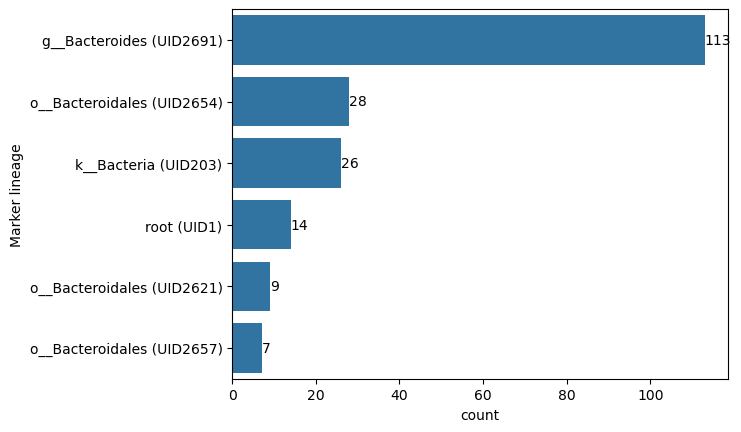

In [9]:
lineage_values = df1['Marker lineage'].value_counts().to_frame().reset_index()
# print(lineage_values.head())
ax= sns.barplot(lineage_values, y='Marker lineage', x='count' )
ax.bar_label(ax.containers[0], fontsize=10);

In [10]:
dfconfirmed = pd.read_csv('/global/scratch/projects/fc_wolflab/bbioinfo/empchase/checkm_all/16sdata.txt', sep='\t')
# dfconfirmed['Confirmed'] = pd.to_numeric(dfconfirmed['Confirmed'])
dfconfirmed

,Plate,Well,Species,Strain,Confirmed
0,1,A02,B. vulgatus,WH019,1
1,1,A05,B. vulgatus,WH515,1
2,1,A09,B. vulgatus,VPI-4245,1
3,1,A10,B. dorei,VPI-3776A,1
4,1,B05,B. vulgatus,WH516,1
5,1,E01,B. vulgatus,WH009ab,1
6,1,E02,B. vulgatus,WH108,1
7,1,F01,B. vulgatus,WH013,1
8,1,F05,B. dorei,WH607,1
9,1,F06,P. distasonis,VPI-C30-45,1


In [11]:
# September 18, 2024 interlude with bvbrc data
# bvbrc_dict={'A05':1.6, 'A10':0.2, 'A12':57.7, 'A11':52.6, 'G02':0.2, 'A02':0.2}
bvbrc_dict={'Well':['A05', 'A10', 'A12', 'A11', 'G02', 'A02'], 
           'bvbrc_pct_contam':[1.6, 0.2, 57.7, 52.6, 0.2, 0.2]}
bvbrc_df = pd.DataFrame.from_dict(bvbrc_dict)
bvbrc_df['Plate'] = 1
bvbrc_df

,Well,bvbrc_pct_contam,Plate
0,A05,1.6,1
1,A10,0.2,1
2,A12,57.7,1
3,A11,52.6,1
4,G02,0.2,1
5,A02,0.2,1


In [12]:
df_bvbrcxconfirmed = bvbrc_df.merge(dfconfirmed, on=['Well', 'Plate'])
df_bvbrcxconfirmed

,Well,bvbrc_pct_contam,Plate,Species,Strain,Confirmed
0,A05,1.6,1,B. vulgatus,WH515,1
1,A10,0.2,1,B. dorei,VPI-3776A,1
2,A12,57.7,1,NaN,NaN,10
3,A11,52.6,1,NaN,NaN,10
4,G02,0.2,1,NaN,NaN,10
5,A02,0.2,1,B. vulgatus,WH019,1


In [13]:
df_bvbrcxconfirmed['Confirmed'] = df_bvbrcxconfirmed['Confirmed'].replace({1:True, 10:False})
df_bvbrcxconfirmed

/tmp/ipykernel_1225582/3642767583.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bvbrcxconfirmed['Confirmed'] = df_bvbrcxconfirmed['Confirmed'].replace({1:True, 10:False})


,Well,bvbrc_pct_contam,Plate,Species,Strain,Confirmed
0,A05,1.6,1,B. vulgatus,WH515,True
1,A10,0.2,1,B. dorei,VPI-3776A,True
2,A12,57.7,1,NaN,NaN,False
3,A11,52.6,1,NaN,NaN,False
4,G02,0.2,1,NaN,NaN,False
5,A02,0.2,1,B. vulgatus,WH019,True


In [14]:
df2 = df1.merge(df_bvbrcxconfirmed, left_on=['Plate','Position'], right_on=['Plate','Well'], how='outer')
df2 = df2[['Marker lineage', '# genomes', '# markers', '# marker sets', 'Completeness', 'Contamination', 'Strain heterogeneity', 
        'Plate', 'Well', 'Confirmed', 'Species_y', 'Strain_y', '0',	'1',	'2',	'3',	'4',	'5+', 'bvbrc_pct_contam'	]]
df2.head()

,Marker lineage,# genomes,# markers,# marker sets,Completeness,Contamination,Strain heterogeneity,Plate,Well,Confirmed,Species_y,Strain_y,0,1,2,3,4,5+,bvbrc_pct_contam
0,o__Bacteroidales (UID2657),160,491,269,99.26,2.01,30.0,1,NaN,NaN,NaN,NaN,2,481,7,1,0,0,NaN
1,o__Bacteroidales (UID2654),163,485,265,99.25,0.0,0.0,1,A02,True,B. vulgatus,WH019,2,483,0,0,0,0,0.2
2,g__Bacteroides (UID2691),33,839,309,99.46,0.02,0.0,1,NaN,NaN,NaN,NaN,3,835,1,0,0,0,NaN
3,g__Bacteroides (UID2691),33,839,309,99.14,1.96,47.06,1,NaN,NaN,NaN,NaN,4,818,17,0,0,0,NaN
4,o__Bacteroidales (UID2654),163,486,266,99.25,23.05,21.85,1,A05,True,B. vulgatus,WH515,2,380,98,5,1,0,1.6


In [15]:
df2[df2['bvbrc_pct_contam']==0.2]

,Marker lineage,# genomes,# markers,# marker sets,Completeness,Contamination,Strain heterogeneity,Plate,Well,Confirmed,Species_y,Strain_y,0,1,2,3,4,5+,bvbrc_pct_contam
1,o__Bacteroidales (UID2654),163,485,265,99.25,0.0,0.0,1,A02,True,B. vulgatus,WH019,2,483,0,0,0,0,0.2
9,o__Bacteroidales (UID2654),163,486,266,99.25,0.0,0.0,1,A10,True,B. dorei,VPI-3776A,2,484,0,0,0,0,0.2
74,o__Bacteroidales (UID2654),163,486,266,99.25,0.67,0.0,1,G02,False,NaN,NaN,2,479,5,0,0,0,0.2


<Axes: xlabel='Contamination', ylabel='bvbrc_pct_contam'>

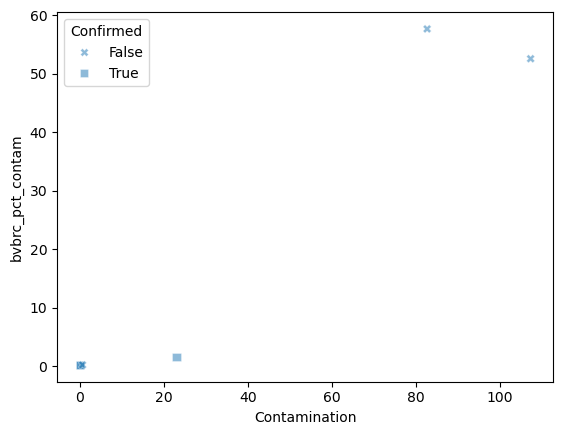

In [16]:
bool_markers = {True:'s', False:'X'}
# sns.scatterplot(df2, y='bvbrc_pct_contam', x='Contamination', hue='Confirmed', legend=True, marker='x')
sns.scatterplot(df2, y='bvbrc_pct_contam', x='Contamination', legend=True, style='Confirmed', markers=bool_markers, alpha=0.5)
# plt.xscale('log')
# plt.yscale('log')

In [17]:
correlation_spearman = df2['bvbrc_pct_contam'].corr(df2['Contamination'], method='spearman')
print("Spearman correlation:", correlation_spearman)

Spearman correlation: 0.8932596002688613
